In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
df = pd.read_csv(r'data_Customer_Churn.csv')

In [3]:
df.head(-10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No


In [4]:
print(df.isnull().sum())  # Count missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
print(df.isnull().sum())  # Count missing values for each column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
print(df.duplicated().sum())  # Count duplicates

0


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
for i in df.columns:
    if i=='customerID':
        continue
    print(f"Value counts for column {i}:")
    print(df[i].value_counts())
    print()

Value counts for column gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for column SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts for column Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for column Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for column tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts for column PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for column MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for column InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value counts for column O

In [11]:
df = df.drop(columns=["customerID"])

In [12]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in numerical_features_list:
    # Check for non-numeric values in the column
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Column '{col}' contains non-numeric values:")
        non_numeric_values = df[col][~df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
        print(non_numeric_values)
        
        # Replace non-numeric values with 0
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df)


Column 'TotalCharges' contains non-numeric values:
488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

Cleaned DataFrame:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042

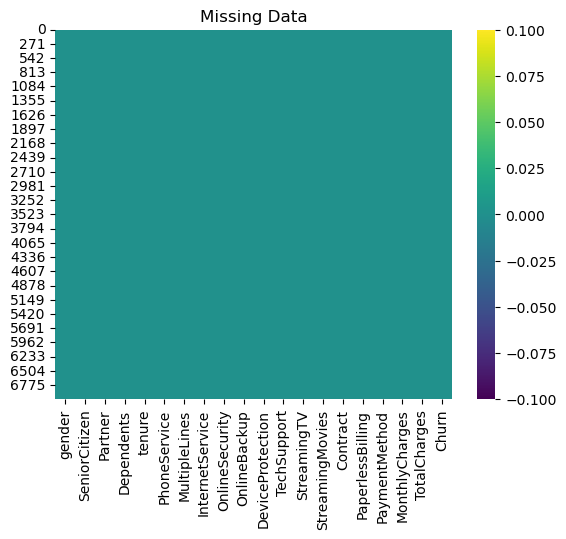

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Data")
plt.show()


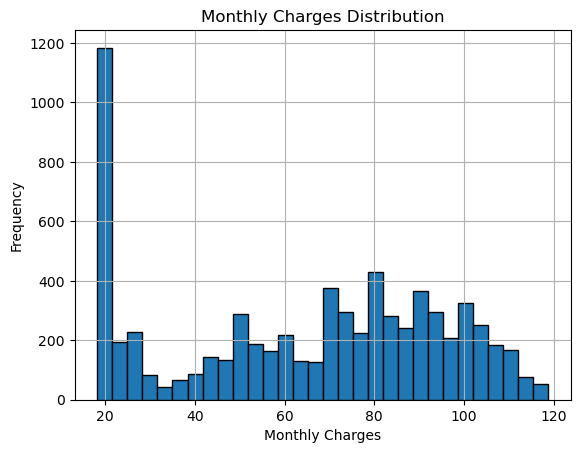

In [14]:
# Histogram for numerical features
df['MonthlyCharges'].hist(bins=30, edgecolor='k')
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

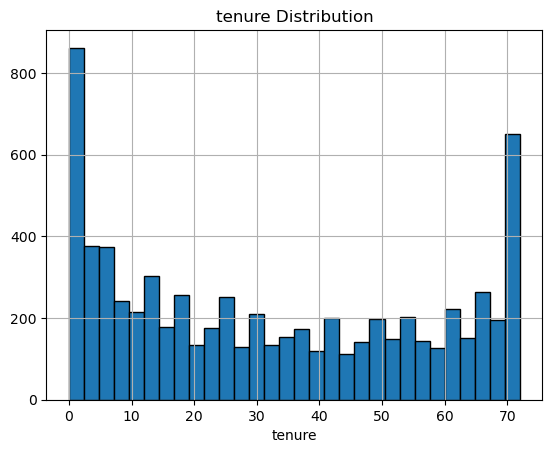

In [15]:
# Histogram for numerical features
df['tenure'].hist(bins=30, edgecolor='k')
plt.title("tenure Distribution")
plt.xlabel("tenure")
plt.show()

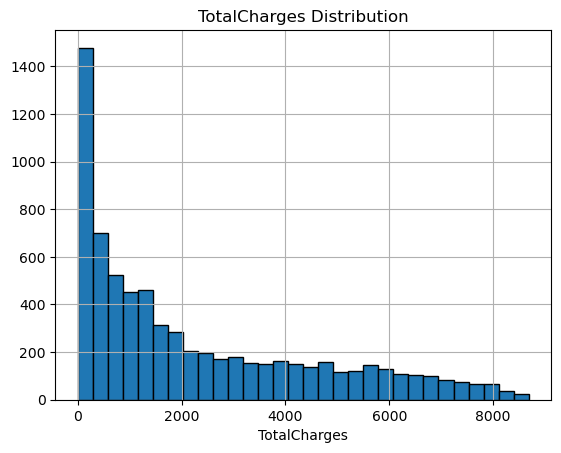

In [16]:
# Histogram for numerical features
df['TotalCharges'].hist(bins=30, edgecolor='k')
plt.title("TotalCharges Distribution")
plt.xlabel("TotalCharges")
plt.show()

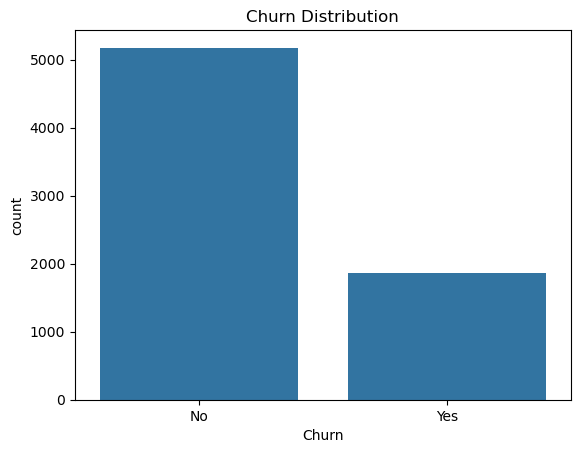

In [17]:
# Bar plot for churn
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

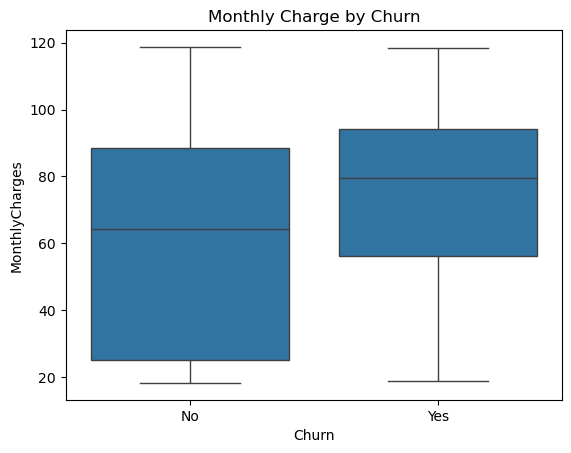

In [18]:
# Boxplot of Monthly Spend by Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charge by Churn")
plt.show()


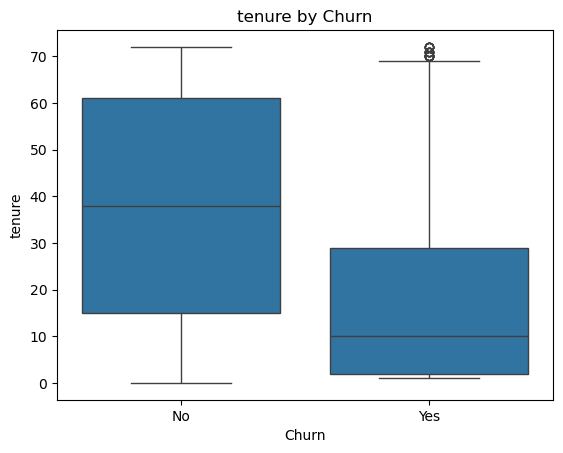

In [19]:
# Boxplot of Monthly Spend by Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("tenure by Churn")
plt.show()

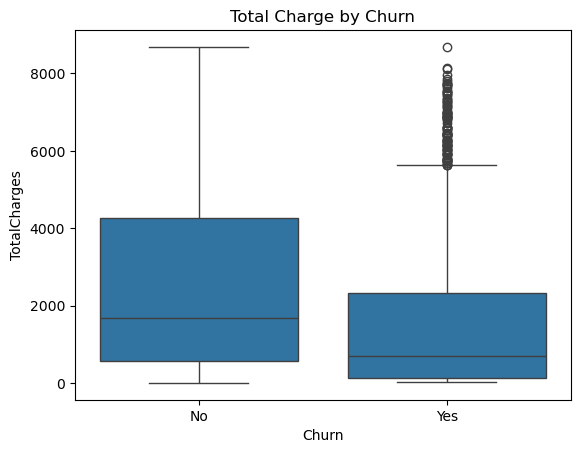

In [20]:
# Boxplot of Monthly Spend by Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charge by Churn")
plt.show()

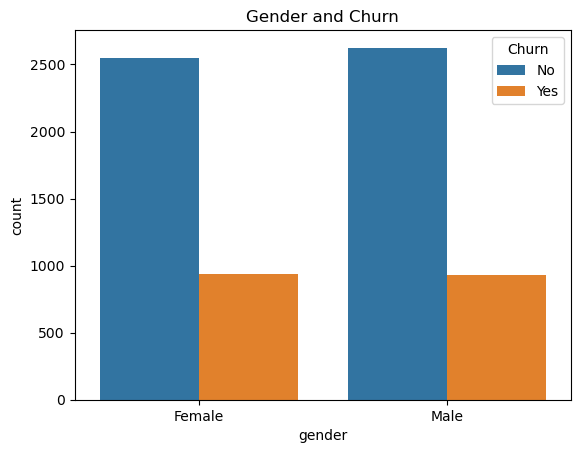

In [21]:
# Count plot of Gender by Churn
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender and Churn")
plt.show()

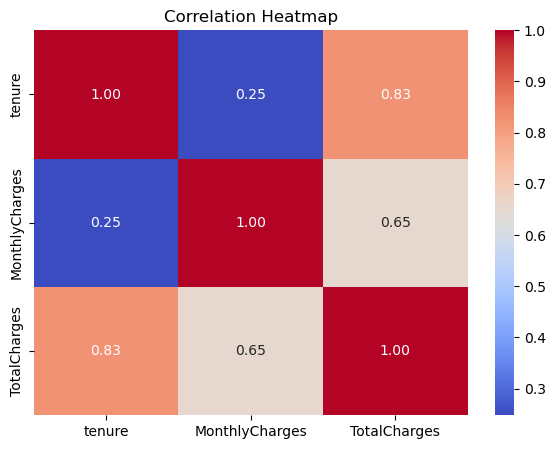

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df["Churn"] = df["Churn"].replace({'Yes': 1, 'No': 0})

C:\Users\hp\AppData\Local\Temp\ipykernel_5308\1957940908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({'Yes': 1, 'No': 0})


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [30]:
object_columns = df.select_dtypes(include="object").columns

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
df.shape

(7043, 20)

In [40]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [42]:
for col in df.columns:
    if col not in numerical_features_list:  # Check if the column is not in the numerical features list
        print(col, df[col].unique())  # Print the column name and its unique values
        print("H" * 50)

gender [0 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
SeniorCitizen [0 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
Partner [1 0]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
Dependents [0 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
PhoneService [0 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
MultipleLines [1 0 2]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
InternetService [0 1 2]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
OnlineSecurity [0 2 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
OnlineBackup [2 0 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
DeviceProtection [0 2 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
TechSupport [0 2 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
StreamingTV [0 2 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
StreamingMovies [0 2 1]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
Contract [0 1 2]
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
Paperle

In [44]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [46]:
# split training and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., random_state=42)

In [47]:
#print(y_train.shape)

In [48]:
#print(y_train.value_counts())


In [49]:
# Apply SMOTE to oversample the minority class
#smote = SMOTE(random_state=42)  # Fix the random state for reproducibility

In [50]:
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
#print(y_train_smote.shape)

In [52]:
#print(y_train_smote.value_counts())

In [53]:
# models = {
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42)
# }

In [54]:
# # dictionary to store the cross validation results
# cv_scores = {}

# # perform 5-fold cross validation for each model
# for model_name, model in models.items():
#   print(f"Training {model_name} with default parameters")
#   scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
#   cv_scores[model_name] = scores
#   print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
#   print("LOL"*30)

In [55]:
# cv_scores

In [56]:
# rfc = RandomForestClassifier(random_state=42)

In [57]:
# rfc.fit(X_train_smote, y_train_smote)

In [58]:
# # evaluate on test data
# y_test_pred = rfc.predict(X_test)

# print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
# print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
# Define test sizes to evaluate
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Store results for each model and test size
results = []

# Dictionary to store the cross-validation results
cv_scores = {}

# Loop through each model
for model_name, model in models.items():
    print(f"\nEvaluating Model: {model_name}")
    
    # Loop through each test size
    for test_size in test_sizes:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        # Apply SMOTE to the training data (optional)
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        
        # Train the model
        model.fit(X_train_resampled, y_train_resampled)
        
        # Evaluate performance
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the result
        results.append((model_name, test_size, accuracy))
        print(f"Test size: {test_size}, Accuracy: {accuracy:.4f}")

    # Perform 5-fold cross-validation for the model using the resampled training data
    print(f"\nTraining {model_name} with default parameters for cross-validation")
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
    print("LOL" * 30)

# Find the best model and test size
best_result = max(results, key=lambda x: x[2])  # Maximize accuracy
print(f"\nBest Model: {best_result[0]}, Best test_size: {best_result[1]} with Accuracy: {best_result[2]:.4f}")

# Print cross-validation results
print("\nCross-validation results:")
for model_name, scores in cv_scores.items():
    print(f"{model_name}: {scores} (mean: {np.mean(scores):.2f})")


Evaluating Model: Decision Tree
Test size: 0.1, Accuracy: 0.7291
Test size: 0.2, Accuracy: 0.7282
Test size: 0.3, Accuracy: 0.7170
Test size: 0.4, Accuracy: 0.7239
Test size: 0.5, Accuracy: 0.7084

Training Decision Tree with default parameters for cross-validation
Decision Tree cross-validation accuracy: 0.78
LOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOL

Evaluating Model: Random Forest
Test size: 0.1, Accuracy: 0.7844
Test size: 0.2, Accuracy: 0.7786
Test size: 0.3, Accuracy: 0.7695
Test size: 0.4, Accuracy: 0.7757
Test size: 0.5, Accuracy: 0.7791

Training Random Forest with default parameters for cross-validation
Random Forest cross-validation accuracy: 0.84
LOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOLLOL

Evaluating Model: XGBoost
Test size: 0.1, Accuracy: 0.7787
Test size: 0.2, Accuracy: 0.7857
Test size: 0.3, Accuracy: 0.7690
Test size: 0.4, Accuracy: 0.7679
Test size: 0.5, Accuracy: 0.7635
